<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/07_model_evaluation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model Evaluation

Goal:
- Visualize evaluation metrics
- Compare ROC and PR curves
- Understand threshold effects
- Demonstrate calibration


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
)
from sklearn.calibration import calibration_curve

In [2]:
X, y = make_classification(
    n_samples=5000,
    n_features=10,
    weights=[0.95, 0.05],
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [3]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [4]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))

Confusion Matrix:
[[1392    6]
 [  79   23]]
Precision: 0.7931034482758621
Recall: 0.22549019607843138
F1: 0.3511450381679389
ROC AUC: 0.9024446688546663


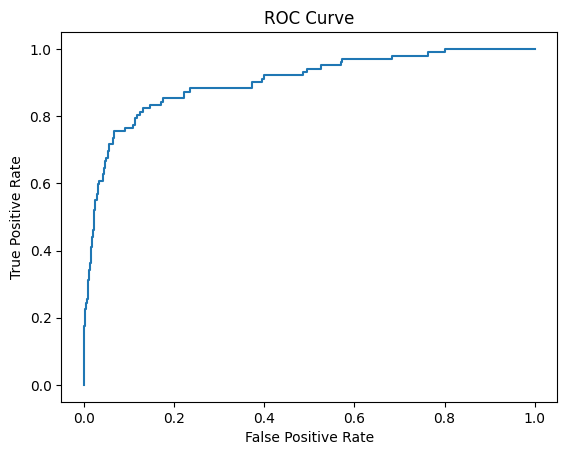

In [5]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

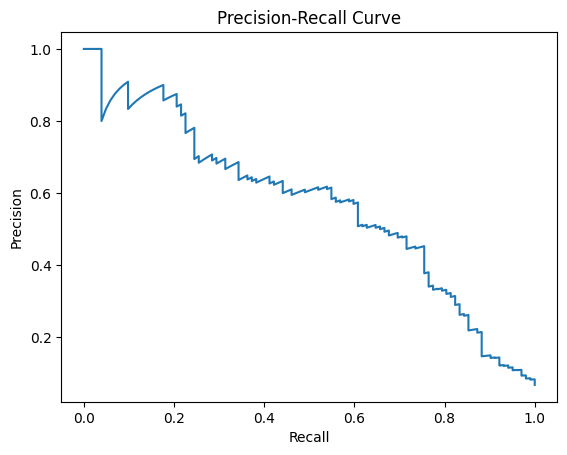

In [6]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

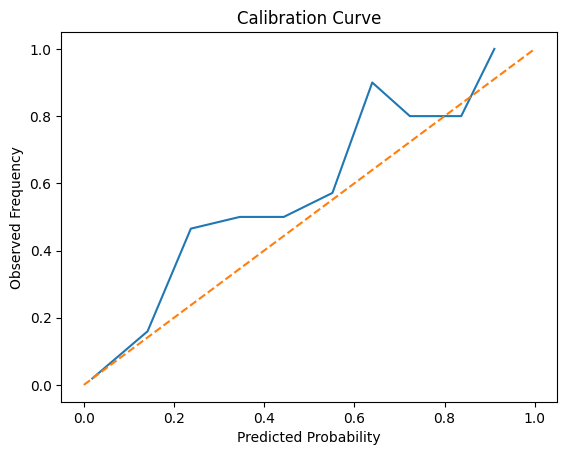

In [7]:
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.plot(prob_pred, prob_true)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Curve")
plt.show()

Observations:

- Accuracy alone is insufficient in imbalanced datasets.
- ROC curve shows ranking ability.
- PR curve highlights minority class performance.
- Calibration curve reveals probability reliability.
